Leaks detected in pressure sensors: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Leaks detected in temperature sensors: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Leaks detected in flow_rate sensors: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Leaks detected in vibration sensors: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Leaks detected in acoustic sensors: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Leaks detected in hydrocarbon_gas sensors: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


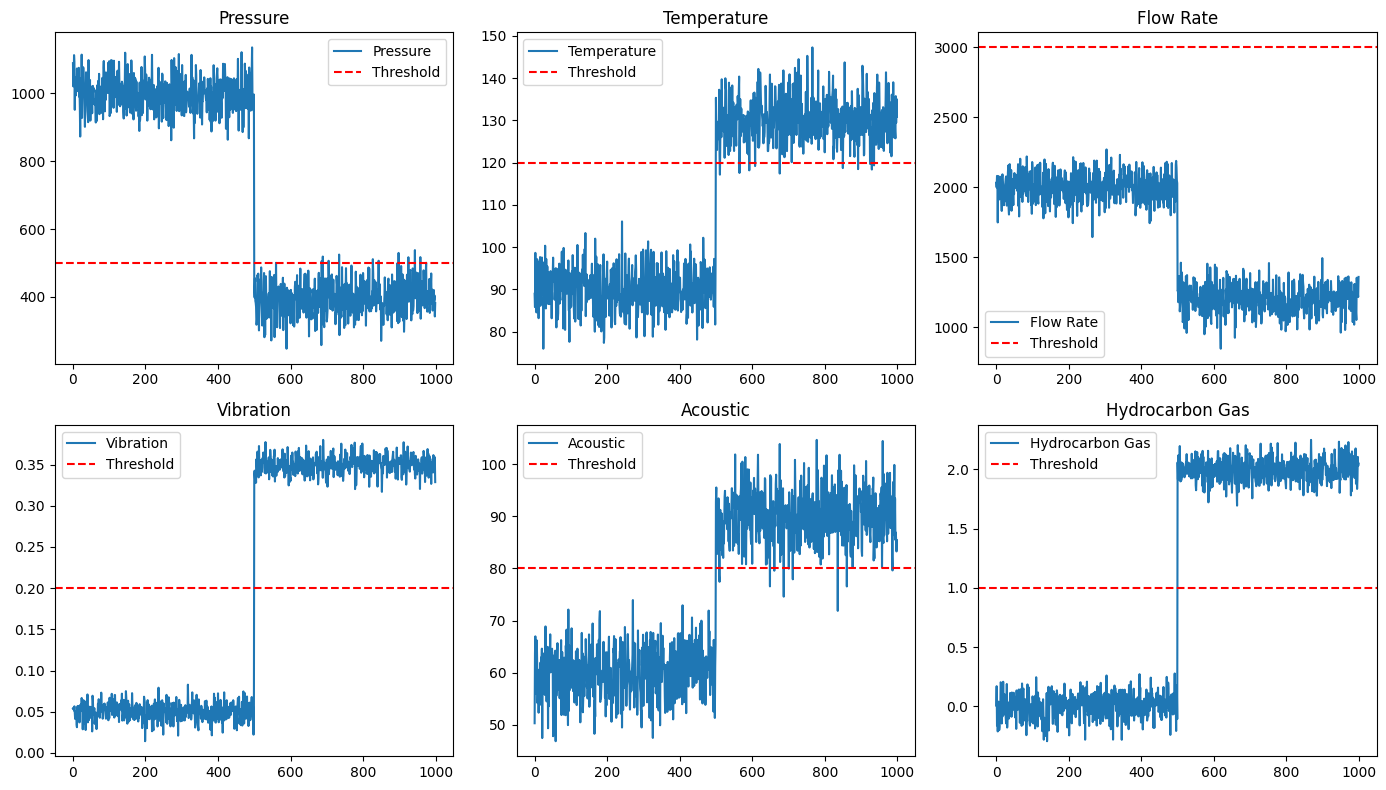

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set simulation parameters
num_sensors = 10
num_samples = 1000
leak_thresholds = {
    "pressure": 500,        # psi
    "temperature": 120,     # °F
    "flow_rate": 3000,      # barrels per hour
    "vibration": 0.2,       # inches per second
    "acoustic": 80,         # dB
    "hydrocarbon_gas": 1    # ppm
}

# Generate synthetic data
np.random.seed(0)  # For reproducibility
pressure = np.random.normal(1000, 50, (num_sensors, num_samples))
temperature = np.random.normal(90, 5, (num_sensors, num_samples))
flow_rate = np.random.normal(2000, 100, (num_sensors, num_samples))
vibration = np.random.normal(0.05, 0.01, (num_sensors, num_samples))
acoustic = np.random.normal(60, 5, (num_sensors, num_samples))
hydrocarbon_gas = np.random.normal(0, 0.1, (num_sensors, num_samples))

# Introduce a leak event
leak_time = 500
pressure[:, leak_time:] -= 600
temperature[:, leak_time:] += 40
flow_rate[:, leak_time:] -= 800
vibration[:, leak_time:] += 0.3
acoustic[:, leak_time:] += 30
hydrocarbon_gas[:, leak_time:] += 2

# Function to detect leaks
def detect_leaks(data, threshold, sensor_type):
    leaks = []
    for sensor in range(data.shape[0]):
        if any(data[sensor] > threshold) if sensor_type == "temperature" or sensor_type == "acoustic" or sensor_type == "hydrocarbon_gas" else any(data[sensor] < threshold):
            leaks.append(sensor)
    return leaks

# Detect leaks
leaks_detected = {
    "pressure": detect_leaks(pressure, leak_thresholds["pressure"], "pressure"),
    "temperature": detect_leaks(temperature, leak_thresholds["temperature"], "temperature"),
    "flow_rate": detect_leaks(flow_rate, leak_thresholds["flow_rate"], "flow_rate"),
    "vibration": detect_leaks(vibration, leak_thresholds["vibration"], "vibration"),
    "acoustic": detect_leaks(acoustic, leak_thresholds["acoustic"], "acoustic"),
    "hydrocarbon_gas": detect_leaks(hydrocarbon_gas, leak_thresholds["hydrocarbon_gas"], "hydrocarbon_gas")
}

# Print results
for sensor_type, leaks in leaks_detected.items():
    if leaks:
        print(f"Leaks detected in {sensor_type} sensors: {leaks}")
    else:
        print(f"No leaks detected in {sensor_type} sensors.")

# Plotting some sample data for visualization
plt.figure(figsize=(14, 8))

plt.subplot(231)
plt.plot(pressure[0], label="Pressure")
plt.axhline(y=leak_thresholds["pressure"], color='r', linestyle='--', label="Threshold")
plt.title("Pressure")
plt.legend()

plt.subplot(232)
plt.plot(temperature[0], label="Temperature")
plt.axhline(y=leak_thresholds["temperature"], color='r', linestyle='--', label="Threshold")
plt.title("Temperature")
plt.legend()

plt.subplot(233)
plt.plot(flow_rate[0], label="Flow Rate")
plt.axhline(y=leak_thresholds["flow_rate"], color='r', linestyle='--', label="Threshold")
plt.title("Flow Rate")
plt.legend()

plt.subplot(234)
plt.plot(vibration[0], label="Vibration")
plt.axhline(y=leak_thresholds["vibration"], color='r', linestyle='--', label="Threshold")
plt.title("Vibration")
plt.legend()

plt.subplot(235)
plt.plot(acoustic[0], label="Acoustic")
plt.axhline(y=leak_thresholds["acoustic"], color='r', linestyle='--', label="Threshold")
plt.title("Acoustic")
plt.legend()

plt.subplot(236)
plt.plot(hydrocarbon_gas[0], label="Hydrocarbon Gas")
plt.axhline(y=leak_thresholds["hydrocarbon_gas"], color='r', linestyle='--', label="Threshold")
plt.title("Hydrocarbon Gas")
plt.legend()

plt.tight_layout()
plt.show()
